### Name: Nirajan Khatiwada

### Data Science Intern at Oasis Infobyte

### Task 3 - Car Price Prediction With Machine Learning

#### Importing Required Libraries

Firtly, we will need to import the necessary libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

#### Load the required data

Loading the provided data

In [2]:
df = pd.read_csv('CarData.csv')

#### Data Analysis

In [3]:
# Displaying the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [4]:
# To get the shape of the data
df.shape

(301, 9)

In [5]:
# Checking for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
# To get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# To get the description of the data
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Computing the correlation matrix for numerical columns and visualizing it using a heatmap.
It helps us to understand the relationships between different numerical features.

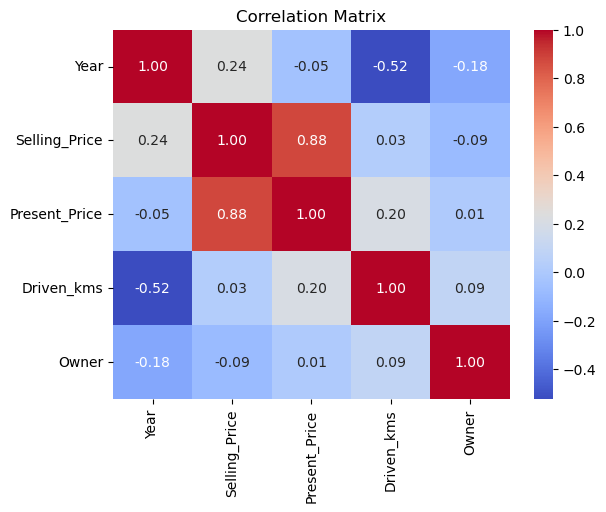

In [8]:
# Correlation matrix
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# Heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Data Preprocessing


Encoding categorical variables to numerical values for model training.

In [9]:
# Encoding categorical variables
def encode_categorical_columns(df):
    df.replace({'Selling_type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
    df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)
    df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

encode_categorical_columns(df) 


Identifying and removing the outliers from numerical columns using z-scores.

In [12]:
# Handling outliers
z_scores = np.abs(zscore(df[['Year', 'Present_Price', 'Driven_kms']]))
df_no_outliers = df[(z_scores < 3).all(axis=1)] 

Defining features (X) and target variable (Y) for the machine learning models.

In [13]:
# Feature Selection
X = df_no_outliers.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = df_no_outliers['Selling_Price']

Standardizing numerical features to ensure they are on the same scale.

In [14]:
# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Splitting the dataset into training and testing sets for model evaluation.

In [15]:
# Splitting Data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=2)

Training a Linear Regression model on the training data.

In [17]:
# Linear Regression Model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Printing the coefficients of the linear regression model, indicating the impact of each feature on the target variable.

In [18]:
# Displaying coefficients
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lin_reg_model.coef_})
print(coefficients_df)

         Feature  Coefficient
0           Year     0.637912
1  Present_Price     3.615387
2     Driven_kms    -0.932886
3      Fuel_Type     0.673720
4   Selling_type    -0.354994
5   Transmission     0.095771
6          Owner    -0.151924


Making predictions on the training data using the trained linear regression model.

In [20]:
# Prediction on the training data
training_data_prediction = lin_reg_model.predict(X_train)

Visualizing the actual vs. predicted prices to assess the performance of the linear regression model.

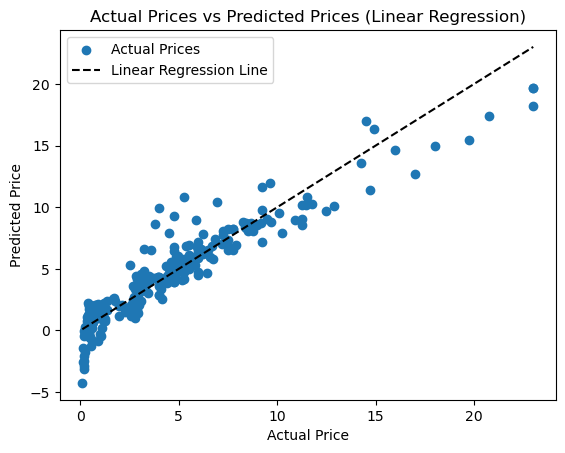

In [22]:
# Visualizing the actual vs. predicted prices for linear regression
plt.scatter(Y_train, training_data_prediction, label='Actual Prices')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], '--k', label='Linear Regression Line')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Linear Regression)")
plt.legend()
plt.show()

In [23]:
# Model Evaluation Metrics
mae = metrics.mean_absolute_error(Y_train, training_data_prediction)
mse = metrics.mean_squared_error(Y_train, training_data_prediction)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 1.0238165382308864
Mean Squared Error: 2.1495873593727253


Fitting a Lasso regression model to the training data, an alternative regression technique.

In [25]:
# Lasso Regression Model
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [26]:
# Prediction on the training data for Lasso
training_data_prediction_lasso = lasso_reg_model.predict(X_train)

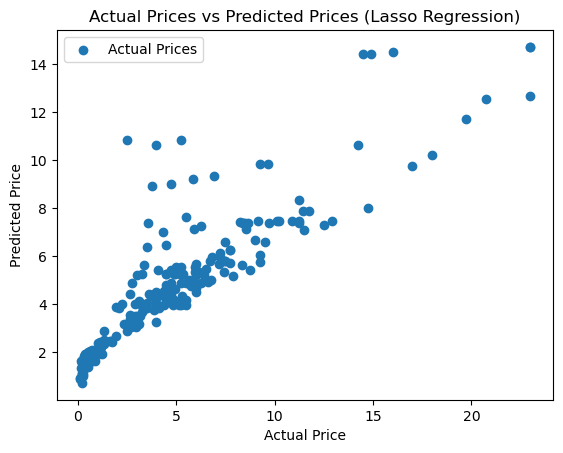

In [27]:
# Visualizing the actual vs. predicted prices for lasso regression
plt.scatter(Y_train, training_data_prediction_lasso, label='Actual Prices')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Lasso Regression)")
plt.legend()
plt.show()

#### Data Visualization

Using box plots to visualize the impact of categorical variables on selling prices.

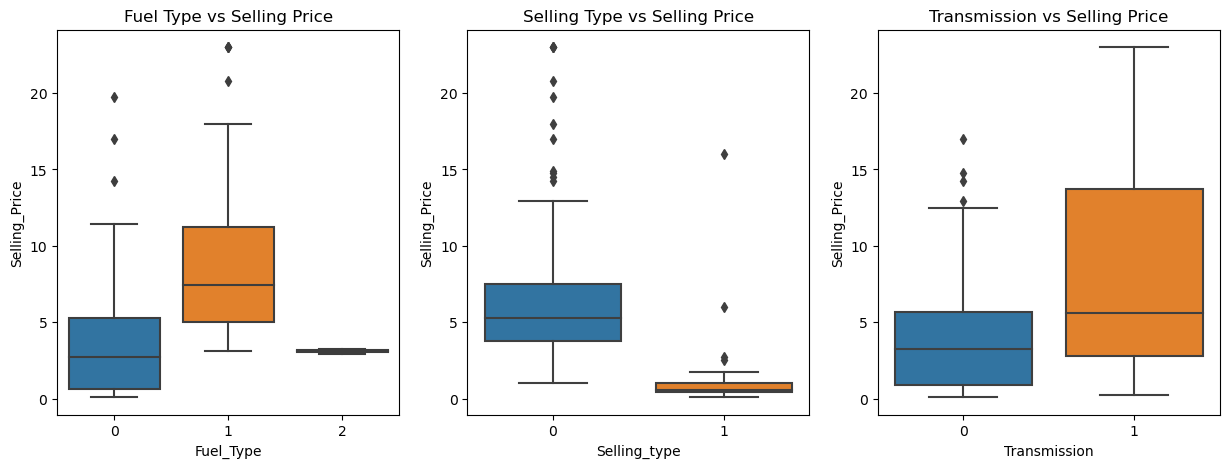

In [29]:
# Box plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df_no_outliers, ax=axes[0])  # Changed from data to df
axes[0].set_title("Fuel Type vs Selling Price")

sns.boxplot(x='Selling_type', y='Selling_Price', data=df_no_outliers, ax=axes[1])  # Changed from data to df
axes[1].set_title("Selling Type vs Selling Price")

sns.boxplot(x='Transmission', y='Selling_Price', data=df_no_outliers, ax=axes[2])  # Changed from data to df
axes[2].set_title("Transmission vs Selling Price")

plt.show()

A residual plot is created to analyze the distribution of residuals from the linear regression model.

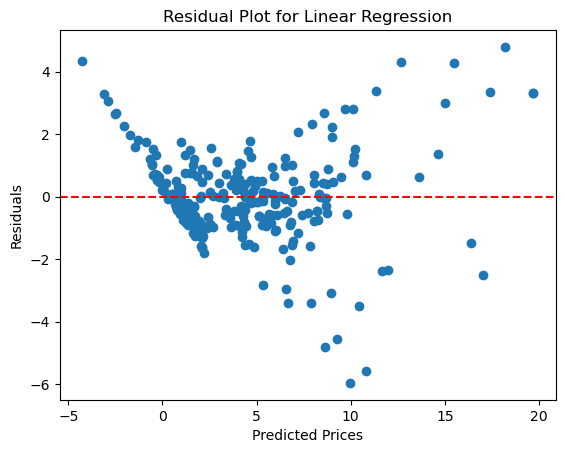

In [30]:
# Residual Analysis
residuals = Y_train - training_data_prediction
plt.scatter(training_data_prediction, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.show()

 Scatter plot is used to compare actual prices with predicted prices on the test set.

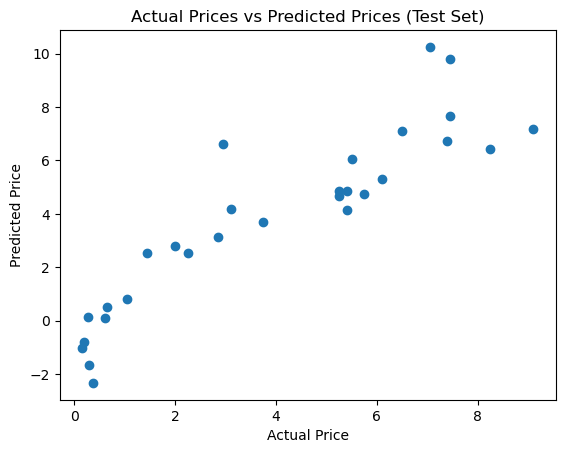

In [32]:
# Actual vs Predicted Prices Comparison
test_data_prediction = lin_reg_model.predict(X_test)

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Test Set)")
plt.show()

Mean Absolute Error (MAE) and Mean Squared Error (MSE) are calculated for the model's performance on the test set.

In [34]:
# Model Evaluation Metrics on Test Set
mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)
mse_test = metrics.mean_squared_error(Y_test, test_data_prediction)

print(f"Mean Absolute Error (Test Set): {mae_test}")
print(f"Mean Squared Error (Test Set): {mse_test}")

Mean Absolute Error (Test Set): 1.0719818994586043
Mean Squared Error (Test Set): 2.0200355145047637
